<a href="https://colab.research.google.com/github/Araken13/AMIGO-SECRETO-CHALENGER/blob/main/TelecomX_parte2_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import seaborn as sns       # Biblioteca para visualização estatística
import matplotlib.pyplot as plt  # Gráficos básicos e avançados
import numpy as sn          # Operações numéricas (alias não convencional)
import pandas as pd         # Manipulação de dados tabulares

In [104]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [105]:
dados.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [107]:
dados.columns

Index(['ID_Cliente', 'Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge',
       'Possui_Dependentes', 'Meses_Permanencia', 'Servico_Telefone',
       'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total'],
      dtype='object')

In [99]:
dados.dropna(subset=['Cancelou'], inplace=True)



In [100]:
dados.to_csv('dados_tratados.csv', index=False)

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [108]:
dados['Cancelou'].value_counts()

,count
Cancelou,
No,5174
Yes,1869


In [109]:
# Calcula a proporção percentual de cancelamentos
dados_ativos_proporcao = (dados['Cancelou'].value_counts() / len(dados)) * 100

# Exibe o resultado
dados_ativos_proporcao

,count
Cancelou,
No,73.463013
Yes,26.536987


Codificação de Variáveis Categóricas: Transformamos as colunas categóricas em formato numérico usando one-hot encoding (pd.get_dummies) para prepará-las para modelagem.

In [110]:
# Codifica variáveis categóricas com one-hot encoding
dados_encoded = pd.get_dummies(
    dados,
    columns=[
        'Cancelou', 'Genero', 'Possui_Conjuge', 'Possui_Dependentes',
        'Servico_Telefone', 'Multiplas_Linhas', 'Tipo_Internet',
        'OnlineSecurity', 'Backup_Online', 'Protecao_Dispositivo',
        'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
        'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento'
    ],
    drop_first=True,
    dtype=int
)

# Exibe as primeiras linhas do DataFrame codificado
display(dados_encoded.head())

# Lista usada para codificação (mantida para referência)
categoricas_cols = [
    'Cancelou', 'Genero', 'Possui_Conjuge', 'Possui_Dependentes',
    'Servico_Telefone', 'Multiplas_Linhas', 'Tipo_Internet',
    'OnlineSecurity', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento'
]

,ID_Cliente,Idoso,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total,Cancelou_Yes,Genero_Male,Possui_Conjuge_Yes,Possui_Dependentes_Yes,Servico_Telefone_Yes,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1


Matriz de Correlação


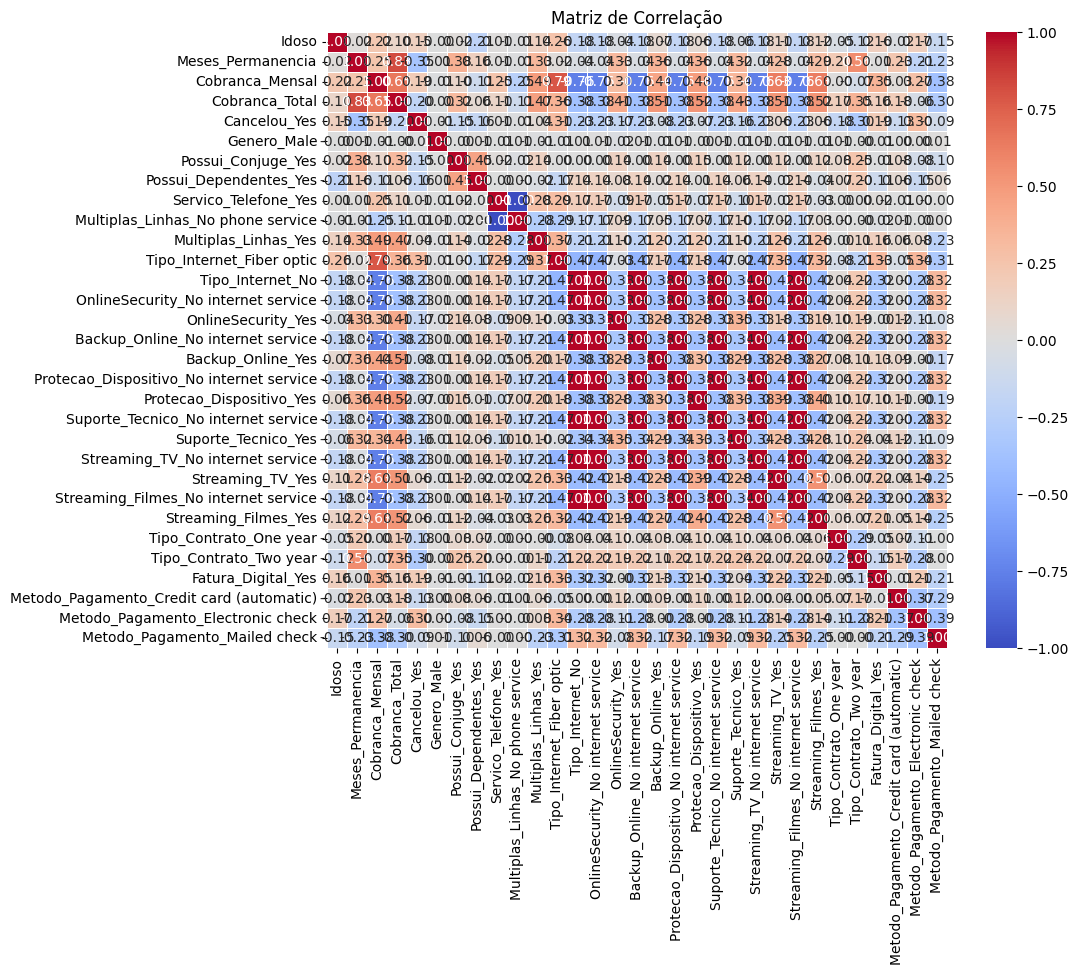

In [111]:
# Visualiza a matriz de correlação entre variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(
    dados_encoded.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5
)
plt.title('Matriz de Correlação')
plt.show()

# Seleciona colunas numéricas e calcula correlação (mantido para referência)
dados_numericos = dados_encoded.select_dtypes(include=['int64', 'float64'])
correlacao = dados_numericos.corr()

In [112]:
# Exibe correlação das variáveis com o cancelamento
print(correlacao['Cancelou_Yes'].sort_values(ascending=False))

# Armazena a correlação ordenada (mantido para referência)
correlacao_target = correlacao['Cancelou_Yes'].sort_values(ascending=False)

Cancelou_Yes                                1.000000
Tipo_Internet_Fiber optic                   0.308020
Metodo_Pagamento_Electronic check           0.301919
Cobranca_Mensal                             0.193356
Fatura_Digital_Yes                          0.191825
Idoso                                       0.150889
Streaming_TV_Yes                            0.063228
Streaming_Filmes_Yes                        0.061382
Multiplas_Linhas_Yes                        0.040102
Servico_Telefone_Yes                        0.011942
Genero_Male                                -0.008612
Multiplas_Linhas_No phone service          -0.011942
Protecao_Dispositivo_Yes                   -0.066160
Backup_Online_Yes                          -0.082255
Metodo_Pagamento_Mailed check              -0.091683
Metodo_Pagamento_Credit card (automatic)   -0.134302
Possui_Conjuge_Yes                         -0.150448
Possui_Dependentes_Yes                     -0.164221
Suporte_Tecnico_Yes                        -0.

In [113]:
# Remove colunas redundantes ou irrelevantes do DataFrame
dados_encoded.drop(
    ['Genero_Male', 'Servico_Telefone_Yes', 'Multiplas_Linhas_No phone service'],
    axis=1,
    inplace=True
)

Tempo de contrato × Evasão

Total gasto × Evasão


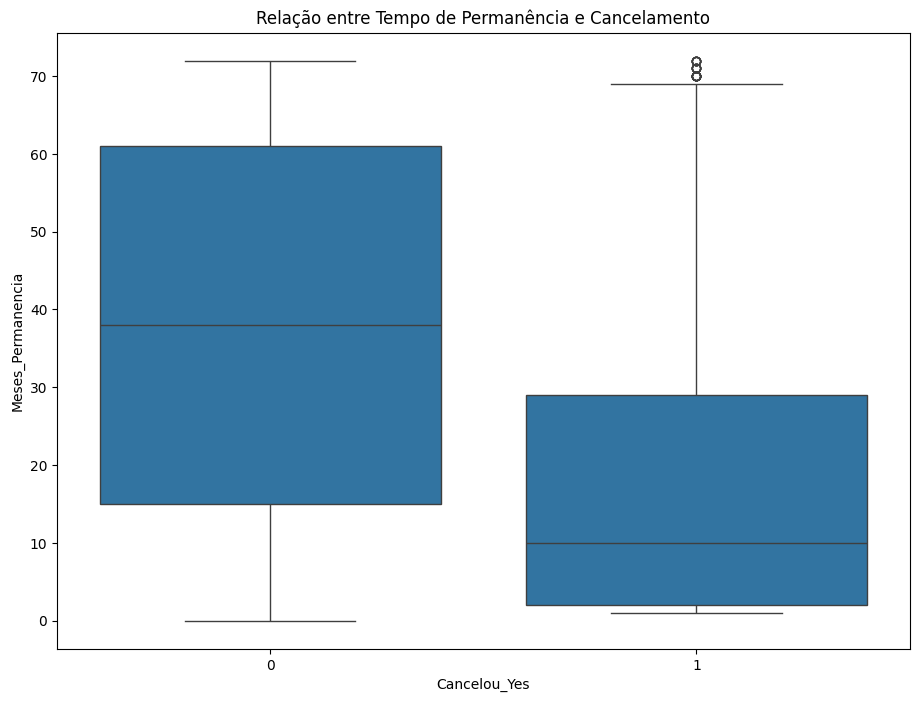

In [114]:
# Visualiza a relação entre tempo de permanência e cancelamento
plt.figure(figsize=(11, 8))
sns.boxplot(x="Cancelou_Yes", y="Meses_Permanencia", data=dados_encoded)
plt.title('Relação entre Tempo de Permanência e Cancelamento')
plt.show()

# Converte a variável de cancelamento para tipo categórico
dados_encoded['Cancelou_Yes'] = dados_encoded['Cancelou_Yes'].astype('category')

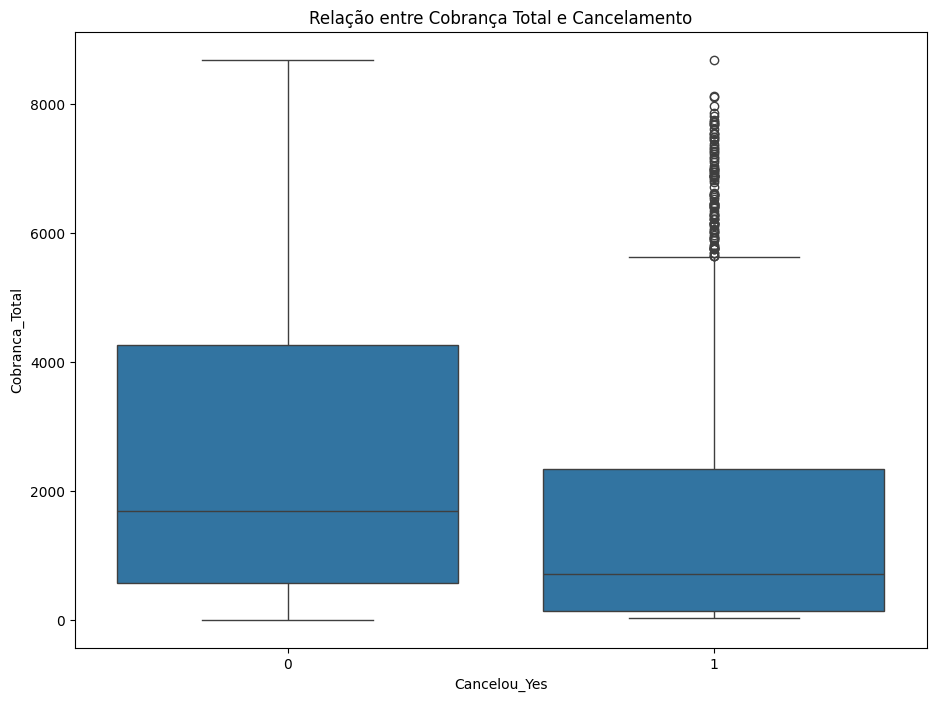

In [115]:
# Visualiza a relação entre cobrança total e cancelamento
plt.figure(figsize=(11, 8))
sns.boxplot(x="Cancelou_Yes", y="Cobranca_Total", data=dados_encoded)
plt.title('Relação entre Cobrança Total e Cancelamento')
plt.show()

# Converte a variável de cancelamento para tipo categórico
dados_encoded['Cancelou_Yes'] = dados_encoded['Cancelou_Yes'].astype('category')

In [116]:
# Remove a coluna de identificação do cliente
dados_encoded.drop('ID_Cliente', axis=1, inplace=True)

# Lista as colunas restantes do DataFrame
dados_encoded.columns

Index(['Idoso', 'Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total',
       'Cancelou_Yes', 'Possui_Conjuge_Yes', 'Possui_Dependentes_Yes',
       'Multiplas_Linhas_Yes', 'Tipo_Internet_Fiber optic', 'Tipo_Internet_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'Backup_Online_No internet service', 'Backup_Online_Yes',
       'Protecao_Dispositivo_No internet service', 'Protecao_Dispositivo_Yes',
       'Suporte_Tecnico_No internet service', 'Suporte_Tecnico_Yes',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Filmes_No internet service', 'Streaming_Filmes_Yes',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
       'Fatura_Digital_Yes', 'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')

Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

Separação de Features e Target: Dividimos os dados codificados em variáveis independentes (X) e a variável dependente (y).
Divisão em Conjuntos de Treino e Teste: Separamos os dados em conjuntos de treino e teste (X_train, X_test, y_train, y_test) usando estratificação para manter a proporção das classes.
Balanceamento de Classes com SMOTE: Aplicamos a técnica SMOTE no conjunto de treino (X_train_res, y_train_res) para balancear a classe minoritária e verificamos o resultado.

In [117]:
from sklearn.model_selection import train_test_split  # Separação entre treino e teste
from imblearn.over_sampling import SMOTE              # Balanceamento de classes com oversampling

In [118]:
# Aplica SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Exibe a contagem das classes após o balanceamento
print(y_train_res.value_counts())

# Separa variáveis independentes e alvo
X = dados_encoded.drop('Cancelou_Yes', axis=1)
y = dados_encoded['Cancelou_Yes']

# Divide os dados em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Cancelou_Yes
0    3622
1    3622
Name: count, dtype: int64


In [122]:
# Exibe o relatório de classificação do modelo Random Forest
print(classification_report(y_test, RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=15,
    min_samples_split=2,
    n_estimators=100
).fit(X_train_res, y_train_res).predict(X_test)))

# Mantém objetos para uso posterior (referência)
best_params = {
    'class_weight': 'balanced',
    'max_depth': 15,
    'min_samples_split': 2,
    'n_estimators': 100
}
modelo = RandomForestClassifier(random_state=42, **best_params)
modelo.fit(X_train_res, y_train_res)
y_pred = modelo.predict(X_test)

# Importa modelo e métrica de avaliação
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1552
           1       0.55      0.65      0.60       561

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113



In [ ]:
from sklearn.neighbors import KNeighborsClassifier     # Classificador KNN
from sklearn.preprocessing import StandardScaler       # Padronização dos dados

# Padroniza os dados de treino e teste
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Treina o modelo KNN com os dados escalados
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_res_scaled, y_train_res)

# Faz previsões e exibe o relatório de classificação
Y_pred_knn = modelo_knn.predict(X_test_scaled)
print(classification_report(y_test, Y_pred_knn))

In [123]:
# Padroniza os dados de treino e teste
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Treina o modelo KNN com os dados escalados
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_res_scaled, y_train_res)

# Faz previsões e exibe o relatório de classificação
Y_pred_knn = modelo_knn.predict(X_test_scaled)
print(classification_report(y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1552
           1       0.49      0.61      0.55       561

    accuracy                           0.73      2113
   macro avg       0.67      0.69      0.68      2113
weighted avg       0.75      0.73      0.74      2113



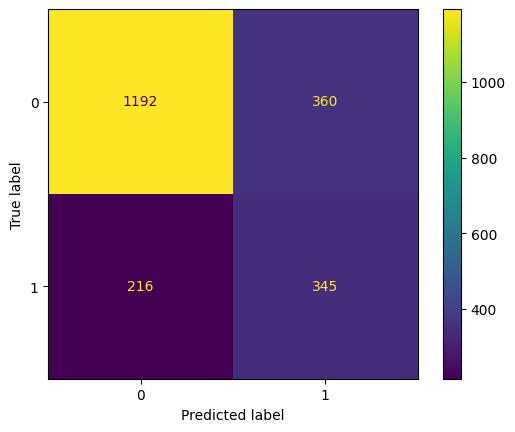

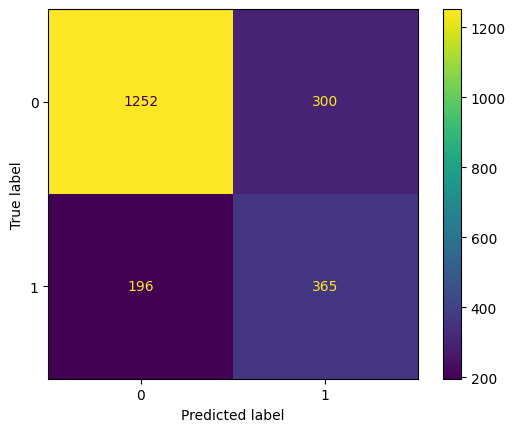

In [124]:
# Exibe matriz de confusão do modelo KNN
ConfusionMatrixDisplay(confusion_matrix(y_test, Y_pred_knn)).plot();

# Exibe matriz de confusão do modelo Random Forest
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

# Importa funções para matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train_res, y_train_res)

print(grid.best_params_)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train_res, y_train_res)

print(grid.best_params_)


 previsão de cancelamento de cliente, o mais importante é:

FN (falsos negativos) → cliente cancela e o modelo não prevê isso (erro grave).

TP (verdadeiros positivos) → cliente que ia cancelar, e o modelo acertou.

Com isso vou utilizar o modelo RandomForestClassifier

In [ ]:
print(' Métricas Random Forest - Treino ')

y_train_pred_rf = modelo.predict(X_train_res)

print(classification_report(y_train_res, y_train_pred_rf))

cm_rf_train = confusion_matrix(y_train_res, y_train_pred_rf)

ConfusionMatrixDisplay(cm_rf_train).plot();

In [ ]:
print("=== MÉTRICAS KNN - TREINO ===")
y_train_pred_knn = modelo_knn.predict(X_train_res_scaled)
print(classification_report(y_train_res, y_train_pred_knn))

cm_knn_train = confusion_matrix(y_train_res, y_train_pred_knn)
ConfusionMatrixDisplay(cm_knn_train).plot();

Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:


In [ ]:
importancias = modelo.feature_importances_
variaveis = X_train.columns

df_importancia = pd.DataFrame({
    'Variável': variaveis,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Variável'], df_importancia['Importância'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

# **  Análise e Estratégias para Redução de Evasão de Clientes**

Nossa análise de dados sobre evasão de clientes (churn) revelou insights cruciais para a retenção. Identificamos os principais fatores de risco e propomos estratégias focadas para combatê-los.


 **Descobertas Chave da Análise**

  Tempo é Ouro: Clientes com menor tempo de permanência e contratos mensais são os mais propensos a cancelar.

  Serviços Agregados Aumentam a Retenção: Clientes que usam serviços como Suporte Técnico e Segurança Online tendem a permanecer mais tempo. A ausência desses serviços aumenta o risco de churn.

  O Enigma da Fibra Óptica: Curiosamente, clientes com serviço de internet fibra óptica apresentam maior propensão a evadir. Isso exige uma investigação mais profunda sobre a qualidade do serviço ou a competitividade na área.

  Laços Familiares Contam: Clientes com cônjuge ou dependentes na conta demonstram menor risco de evasão.



**Modelagem Preditiva**

  Modelo de Escolha: O modelo Random Forest superou o KNN, alcançando um recall de 0.65 para a classe de evasão. Isso significa que ele consegue identificar 65% dos clientes que realmente irão cancelar, tornando-o a melhor ferramenta para nossa estratégia de retenção.

  Prioridade nos Dados: O tempo de permanência (Meses_Permanencia), o tipo de contrato e os serviços agregados são os preditores mais fortes no nosso modelo.


**Estratégias de Retenção Propostas**

  Foco nos Recém-Chegados: Crie um programa de boas-vindas ativo para novos clientes nos primeiros meses. Um bom onboarding pode ser a diferença entre um cliente que fica e um que sai.

  Incentive Contratos Longos: Ofereça descontos ou benefícios exclusivos para clientes que optarem por contratos anuais ou de dois anos.

  Venda Valor, Não Apenas Serviço: Promova a adesão a serviços agregados como Suporte Técnico e Segurança Online, educando o cliente sobre o valor que esses serviços trazem.

  Investigue o Problema da Fibra: Lance uma iniciativa para entender o que está acontecendo com os clientes de fibra. O problema é técnico, de preço ou de concorrência? Use esses insights para corrigir a rota.

  Personalize a Retenção: Use o modelo Random Forest para identificar proativamente os clientes de alto risco e ofereça promoções ou benefícios personalizados antes que eles pensem em cancelar.
